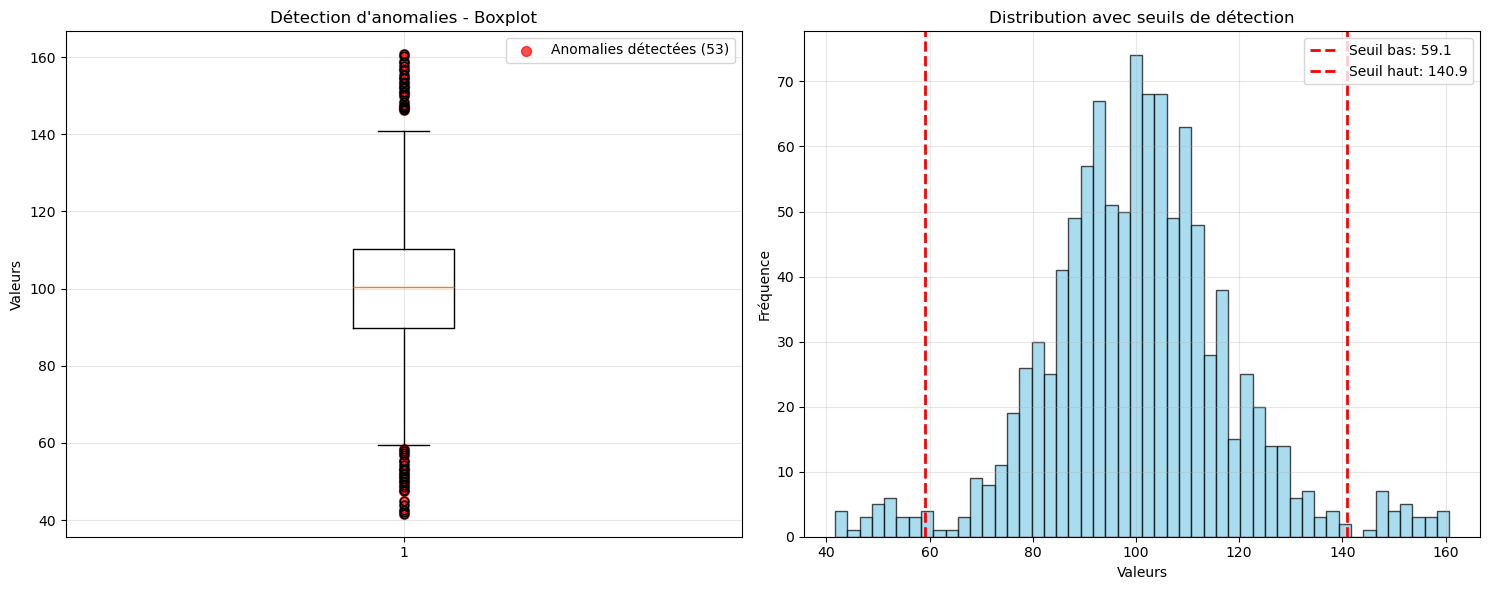

Analyse de la détection d'anomalies:
Anomalies réelles: 50
Anomalies détectées: 53
Vrais positifs: 50
Faux positifs: 3
Faux négatifs: 0
Précision: 0.943
Rappel: 1.000
F1-Score: 0.971

Seuils de détection:
• Limite basse: 59.09
• Limite haute: 140.91
• Intervalle normal: [59.09, 140.91]


In [1]:
#Détection d'anomalies avec IQR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Créer un dataset avec anomalies intentionnelles
np.random.seed(42)
n_normal = 1000
n_anomalies = 50

# Données normales
normal_data = np.random.normal(100, 15, n_normal)

# Ajouter des anomalies
anomalies = np.concatenate([
    np.random.normal(150, 5, n_anomalies//2),  # Anomalies hautes
    np.random.normal(50, 5, n_anomalies//2)    # Anomalies basses
])

# Combiner toutes les données
all_data = np.concatenate([normal_data, anomalies])
data = pd.DataFrame({'value': all_data, 'is_anomaly': [False]*n_normal + [True]*n_anomalies})

def detect_outliers_iqr(data_series, factor=1.5):
    """
    Détecter les anomalies avec la méthode IQR
    
    Args:
        data_series: Série de données
        factor: Facteur multiplicateur (1.5 = outliers, 3.0 = outliers extrêmes)
    """
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    # Identifier les anomalies
    outliers_mask = (data_series < lower_bound) | (data_series > upper_bound)
    
    return outliers_mask, lower_bound, upper_bound

# Appliquer la détection
outliers_mask, lower_bound, upper_bound = detect_outliers_iqr(data['value'])

# Visualiser les résultats
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Boxplot avec anomalies
axes[0].boxplot(data['value'], vert=True)
anomalies_detected = data[outliers_mask]['value']
axes[0].scatter([1]*len(anomalies_detected), anomalies_detected, 
               color='red', s=50, alpha=0.7, label=f'Anomalies détectées ({len(anomalies_detected)})')
axes[0].set_title('Détection d\'anomalies - Boxplot')
axes[0].set_ylabel('Valeurs')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Histogramme avec seuils
axes[1].hist(data['value'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[1].axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'Seuil bas: {lower_bound:.1f}')
axes[1].axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'Seuil haut: {upper_bound:.1f}')
axes[1].set_title('Distribution avec seuils de détection')
axes[1].set_xlabel('Valeurs')
axes[1].set_ylabel('Fréquence')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyser les résultats
print("Analyse de la détection d'anomalies:")
print("=" * 50)

true_anomalies = data['is_anomaly'].sum()
detected_anomalies = outliers_mask.sum()
true_positives = (data['is_anomaly'] & outliers_mask).sum()
false_positives = (~data['is_anomaly'] & outliers_mask).sum()
false_negatives = (data['is_anomaly'] & ~outliers_mask).sum()

precision = true_positives / detected_anomalies if detected_anomalies > 0 else 0
recall = true_positives / true_anomalies if true_anomalies > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Anomalies réelles: {true_anomalies}")
print(f"Anomalies détectées: {detected_anomalies}")
print(f"Vrais positifs: {true_positives}")
print(f"Faux positifs: {false_positives}")
print(f"Faux négatifs: {false_negatives}")
print(f"Précision: {precision:.3f}")
print(f"Rappel: {recall:.3f}")
print(f"F1-Score: {f1_score:.3f}")

print(f"\nSeuils de détection:")
print(f"• Limite basse: {lower_bound:.2f}")
print(f"• Limite haute: {upper_bound:.2f}")
print(f"• Intervalle normal: [{lower_bound:.2f}, {upper_bound:.2f}]")

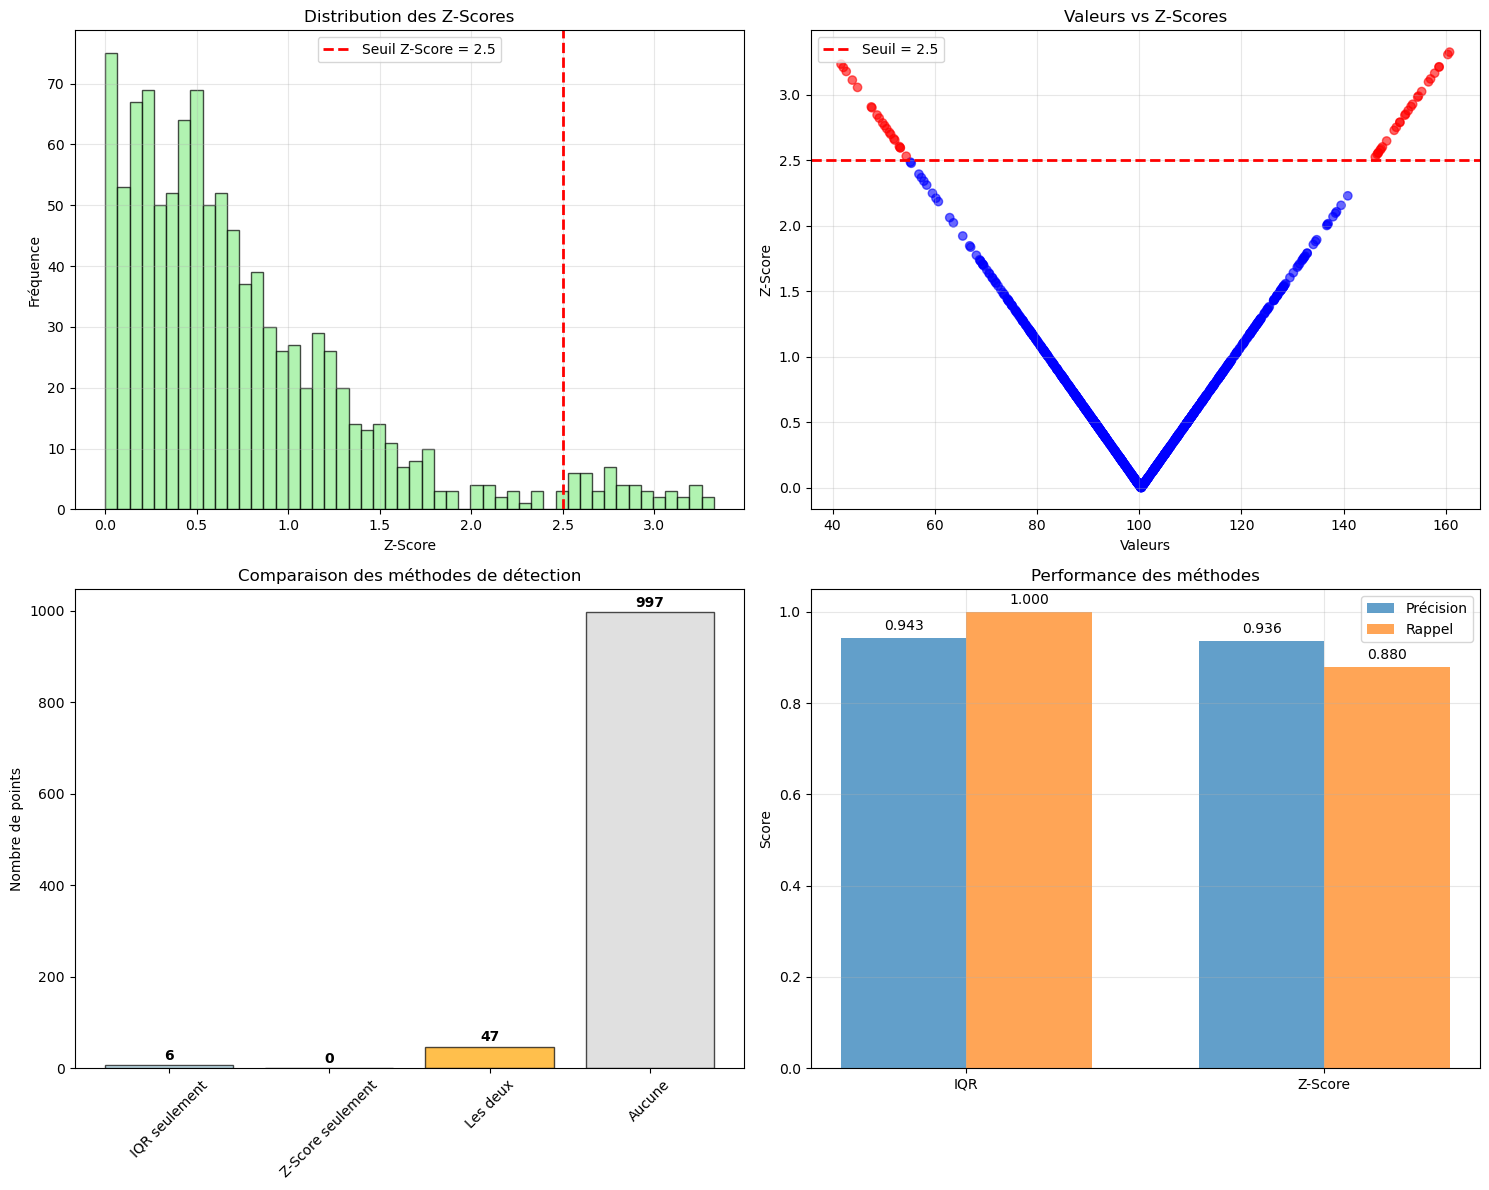


Comparaison des méthodes de détection:
Méthode IQR:
  • Anomalies détectées: 53
  • Précision: 0.943
  • Rappel: 1.000

Méthode Z-Score:
  • Anomalies détectées: 47
  • Précision: 0.936
  • Rappel: 0.880

Accord entre les méthodes:
  • Détectées par les deux: 47
  • Détectées par IQR seulement: 6
  • Détectées par Z-Score seulement: 0

Recommandations:
• IQR semble plus précise pour ce dataset
• IQR détecte plus d'anomalies réelles


In [3]:
#Détection avec Z-Score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def detect_outliers_zscore(data_series, threshold=3):
    """
    Détecter les anomalies avec le Z-Score
    
    Args:
        data_series: Série de données
        threshold: Seuil Z-Score (généralement 2 ou 3)
    """
    z_scores = np.abs(stats.zscore(data_series))
    outliers_mask = z_scores > threshold
    
    return outliers_mask, z_scores

# Utiliser les mêmes données que précédemment
outliers_zscore, z_scores = detect_outliers_zscore(data['value'], threshold=2.5)

# Créer une visualisation comparative
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution des Z-Scores
axes[0, 0].hist(z_scores, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 0].axvline(2.5, color='red', linestyle='--', linewidth=2, label='Seuil Z-Score = 2.5')
axes[0, 0].set_title('Distribution des Z-Scores')
axes[0, 0].set_xlabel('Z-Score')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Scatter plot: Valeurs vs Z-Scores
colors = ['red' if outlier else 'blue' for outlier in outliers_zscore]
axes[0, 1].scatter(data['value'], z_scores, c=colors, alpha=0.6)
axes[0, 1].axhline(2.5, color='red', linestyle='--', linewidth=2, label='Seuil = 2.5')
axes[0, 1].set_title('Valeurs vs Z-Scores')
axes[0, 1].set_xlabel('Valeurs')
axes[0, 1].set_ylabel('Z-Score')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Comparaison des méthodes
comparison_data = pd.DataFrame({
    'value': data['value'],
    'IQR_outlier': outliers_mask,
    'ZScore_outlier': outliers_zscore,
    'True_anomaly': data['is_anomaly']
})

# Diagramme de Venn simplifié
iqr_only = (outliers_mask & ~outliers_zscore).sum()
zscore_only = (~outliers_mask & outliers_zscore).sum()
both_methods = (outliers_mask & outliers_zscore).sum()
neither = (~outliers_mask & ~outliers_zscore).sum()

methods = ['IQR seulement', 'Z-Score seulement', 'Les deux', 'Aucune']
counts = [iqr_only, zscore_only, both_methods, neither]
colors_bar = ['lightblue', 'lightgreen', 'orange', 'lightgray']

axes[1, 0].bar(methods, counts, color=colors_bar, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Comparaison des méthodes de détection')
axes[1, 0].set_ylabel('Nombre de points')
axes[1, 0].tick_params(axis='x', rotation=45)

# Ajouter les valeurs sur les barres
for i, count in enumerate(counts):
    axes[1, 0].text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')

# 4. Métriques de performance par méthode
methods_names = ['IQR', 'Z-Score']
precisions = []
recalls = []

for method_mask in [outliers_mask, outliers_zscore]:
    detected = method_mask.sum()
    tp = (data['is_anomaly'] & method_mask).sum()
    fp = (~data['is_anomaly'] & method_mask).sum()
    fn = (data['is_anomaly'] & ~method_mask).sum()
    
    precision = tp / detected if detected > 0 else 0
    recall = tp / true_anomalies if true_anomalies > 0 else 0
    
    precisions.append(precision)
    recalls.append(recall)

x = np.arange(len(methods_names))
width = 0.35

bars1 = axes[1, 1].bar(x - width/2, precisions, width, label='Précision', alpha=0.7)
bars2 = axes[1, 1].bar(x + width/2, recalls, width, label='Rappel', alpha=0.7)

axes[1, 1].set_title('Performance des méthodes')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(methods_names)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Rapport comparatif
print("\nComparaison des méthodes de détection:")
print("=" * 50)

print("Méthode IQR:")
print(f"  • Anomalies détectées: {outliers_mask.sum()}")
print(f"  • Précision: {precisions[0]:.3f}")
print(f"  • Rappel: {recalls[0]:.3f}")

print("\nMéthode Z-Score:")
print(f"  • Anomalies détectées: {outliers_zscore.sum()}")
print(f"  • Précision: {precisions[1]:.3f}")
print(f"  • Rappel: {recalls[1]:.3f}")

print(f"\nAccord entre les méthodes:")
print(f"  • Détectées par les deux: {both_methods}")
print(f"  • Détectées par IQR seulement: {iqr_only}")
print(f"  • Détectées par Z-Score seulement: {zscore_only}")

# Recommandations
print(f"\nRecommandations:")
if precisions[0] > precisions[1]:
    print("• IQR semble plus précise pour ce dataset")
else:
    print("• Z-Score semble plus précise pour ce dataset")

if recalls[0] > recalls[1]:
    print("• IQR détecte plus d'anomalies réelles")
else:
    print("• Z-Score détecte plus d'anomalies réelles")

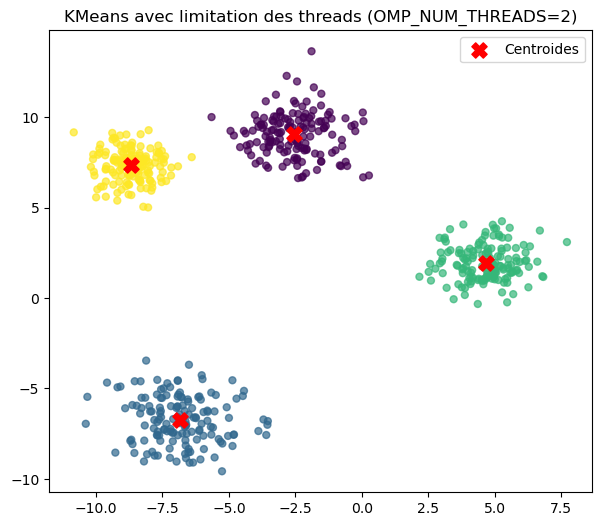

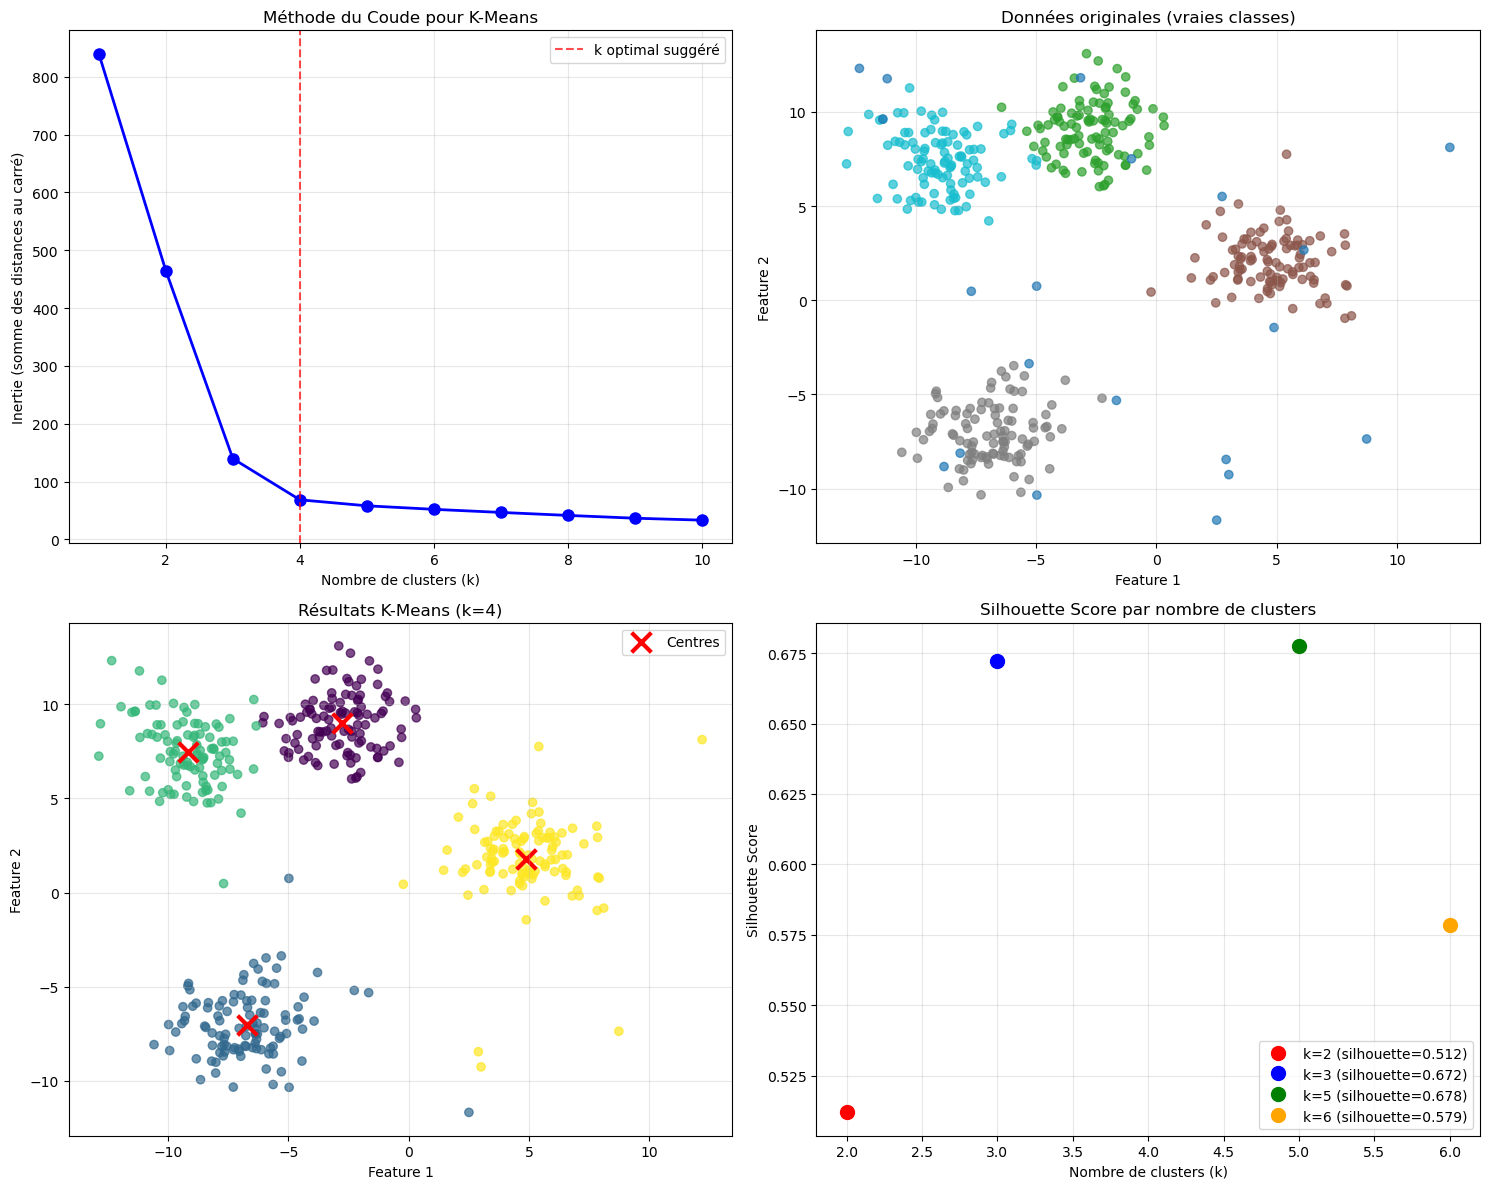

Analyse du clustering K-Means:
Adjusted Rand Index: 0.961
Silhouette Score: 0.680
Inertie finale: 68.54

Analyse des clusters:

Cluster 0:
  • Nombre de points: 106
  • Centre: (-2.78, 9.01)
  • Étendue X: [-6.06, 0.32]
  • Étendue Y: [6.03, 13.09]

Cluster 1:
  • Nombre de points: 107
  • Centre: (-6.73, -7.01)
  • Étendue X: [-10.59, 2.51]
  • Étendue Y: [-11.68, 0.75]

Cluster 2:
  • Nombre de points: 100
  • Centre: (-9.19, 7.45)
  • Étendue X: [-12.88, -6.34]
  • Étendue Y: [0.48, 12.31]

Cluster 3:
  • Nombre de points: 107
  • Centre: (4.87, 1.80)
  • Étendue X: [-0.22, 12.20]
  • Étendue Y: [-9.26, 8.12]

Points potentiellement mal classés: 21
Seuil de distance: 0.636

Recommandations:
• Excellente structure de clustering détectée
• Très bon accord avec la structure réelle


In [4]:
#K-Means clustering avec visualisation
import os
os.environ["OMP_NUM_THREADS"] = "2"     # clave
os.environ["MKL_NUM_THREADS"] = "2"     # opcional
os.environ["NUMEXPR_NUM_THREADS"] = "2" # opcional

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from threadpoolctl import threadpool_limits

# 1. Crear un dataset de prueba (4 clusters)
X, y = make_blobs(
    n_samples=600, 
    centers=4, 
    cluster_std=[1.2, 1.0, 1.3, 0.8], 
    random_state=42
)

# 2. Limitar los hilos de MKL/BLAS durante KMeans
with threadpool_limits(limits=2, user_api='blas'):
    km = KMeans(n_clusters=4, n_init='auto', random_state=42).fit(X)

# 3. Visualizar los clusters
labels = km.labels_
plt.figure(figsize=(7,6))
plt.scatter(X[:,0], X[:,1], c=labels, s=25, cmap="viridis", alpha=0.7)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
            c='red', s=120, marker='X', label='Centroides')
plt.title("KMeans avec limitation des threads (OMP_NUM_THREADS=2)")
plt.legend()
plt.show()

# Créer un dataset avec des clusters naturels
np.random.seed(42)
X, y_true = make_blobs(n_samples=400, centers=4, n_features=2, 
                      cluster_std=1.5, random_state=42)

# Ajouter quelques points de bruit
noise_points = np.random.uniform(X.min(), X.max(), (20, 2))
X = np.vstack([X, noise_points])
y_true = np.concatenate([y_true, [-1]*20])  # -1 pour le bruit

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Méthode du coude pour trouver le nombre optimal de clusters
def plot_elbow_method(X, max_k=10):
    """Tracer la méthode du coude pour déterminer k optimal"""
    inertias = []
    k_range = range(1, max_k + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    
    return k_range, inertias

# Appliquer la méthode du coude
k_range, inertias = plot_elbow_method(X_scaled)

# Créer les visualisations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Méthode du coude
axes[0, 0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_title('Méthode du Coude pour K-Means')
axes[0, 0].set_xlabel('Nombre de clusters (k)')
axes[0, 0].set_ylabel('Inertie (somme des distances au carré)')
axes[0, 0].grid(True, alpha=0.3)

# Marquer le coude suggéré (k=4)
axes[0, 0].axvline(x=4, color='red', linestyle='--', alpha=0.7, label='k optimal suggéré')
axes[0, 0].legend()

# 2. Données originales avec vraies classes
scatter = axes[0, 1].scatter(X[:, 0], X[:, 1], c=y_true, cmap='tab10', alpha=0.7)
axes[0, 1].set_title('Données originales (vraies classes)')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Feature 2')
axes[0, 1].grid(True, alpha=0.3)

# 3. Résultats K-Means avec k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_scaled)

# Retransformer les centres pour l'affichage
centers_original = scaler.inverse_transform(kmeans.cluster_centers_)

scatter = axes[1, 0].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.7)
axes[1, 0].scatter(centers_original[:, 0], centers_original[:, 1], 
                  c='red', marker='x', s=200, linewidths=3, label='Centres')
axes[1, 0].set_title('Résultats K-Means (k=4)')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Comparaison avec différentes valeurs de k
k_values = [2, 3, 5, 6]
colors = ['red', 'blue', 'green', 'orange']

for i, k in enumerate(k_values):
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_temp = kmeans_temp.fit_predict(X_scaled)
    
    # Calculer la silhouette score
    from sklearn.metrics import silhouette_score
    sil_score = silhouette_score(X_scaled, y_temp)
    
    axes[1, 1].plot(k, sil_score, 'o', color=colors[i], markersize=10, 
                   label=f'k={k} (silhouette={sil_score:.3f})')

axes[1, 1].set_title('Silhouette Score par nombre de clusters')
axes[1, 1].set_xlabel('Nombre de clusters (k)')
axes[1, 1].set_ylabel('Silhouette Score')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyser les résultats
print("Analyse du clustering K-Means:")
print("=" * 50)

# Métriques de qualité
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Exclure les points de bruit pour l'évaluation
mask_no_noise = y_true != -1
if mask_no_noise.sum() > 0:
    ari = adjusted_rand_score(y_true[mask_no_noise], y_pred[mask_no_noise])
    print(f"Adjusted Rand Index: {ari:.3f}")

sil_score = silhouette_score(X_scaled, y_pred)
print(f"Silhouette Score: {sil_score:.3f}")

print(f"Inertie finale: {kmeans.inertia_:.2f}")

# Analyser chaque cluster
print(f"\nAnalyse des clusters:")
for i in range(4):
    cluster_points = (y_pred == i).sum()
    cluster_data = X[y_pred == i]
    
    print(f"\nCluster {i}:")
    print(f"  • Nombre de points: {cluster_points}")
    print(f"  • Centre: ({centers_original[i, 0]:.2f}, {centers_original[i, 1]:.2f})")
    if len(cluster_data) > 0:
        print(f"  • Étendue X: [{cluster_data[:, 0].min():.2f}, {cluster_data[:, 0].max():.2f}]")
        print(f"  • Étendue Y: [{cluster_data[:, 1].min():.2f}, {cluster_data[:, 1].max():.2f}]")

# Identifier les points potentiellement mal classés
from sklearn.metrics.pairwise import euclidean_distances

distances_to_centers = euclidean_distances(X_scaled, kmeans.cluster_centers_)
min_distances = np.min(distances_to_centers, axis=1)
threshold = np.percentile(min_distances, 95)  # 95e percentile

potential_outliers = min_distances > threshold
print(f"\nPoints potentiellement mal classés: {potential_outliers.sum()}")
print(f"Seuil de distance: {threshold:.3f}")

# Recommandations
print(f"\nRecommandations:")
if sil_score > 0.5:
    print("• Excellente structure de clustering détectée")
elif sil_score > 0.3:
    print("• Structure de clustering correcte")
else:
    print("• Structure de clustering faible - considérer d'autres méthodes")

if ari > 0.7:
    print("• Très bon accord avec la structure réelle")
elif ari > 0.3:
    print("• Accord modéré avec la structure réelle")
else:
    print("• Faible accord avec la structure réelle")

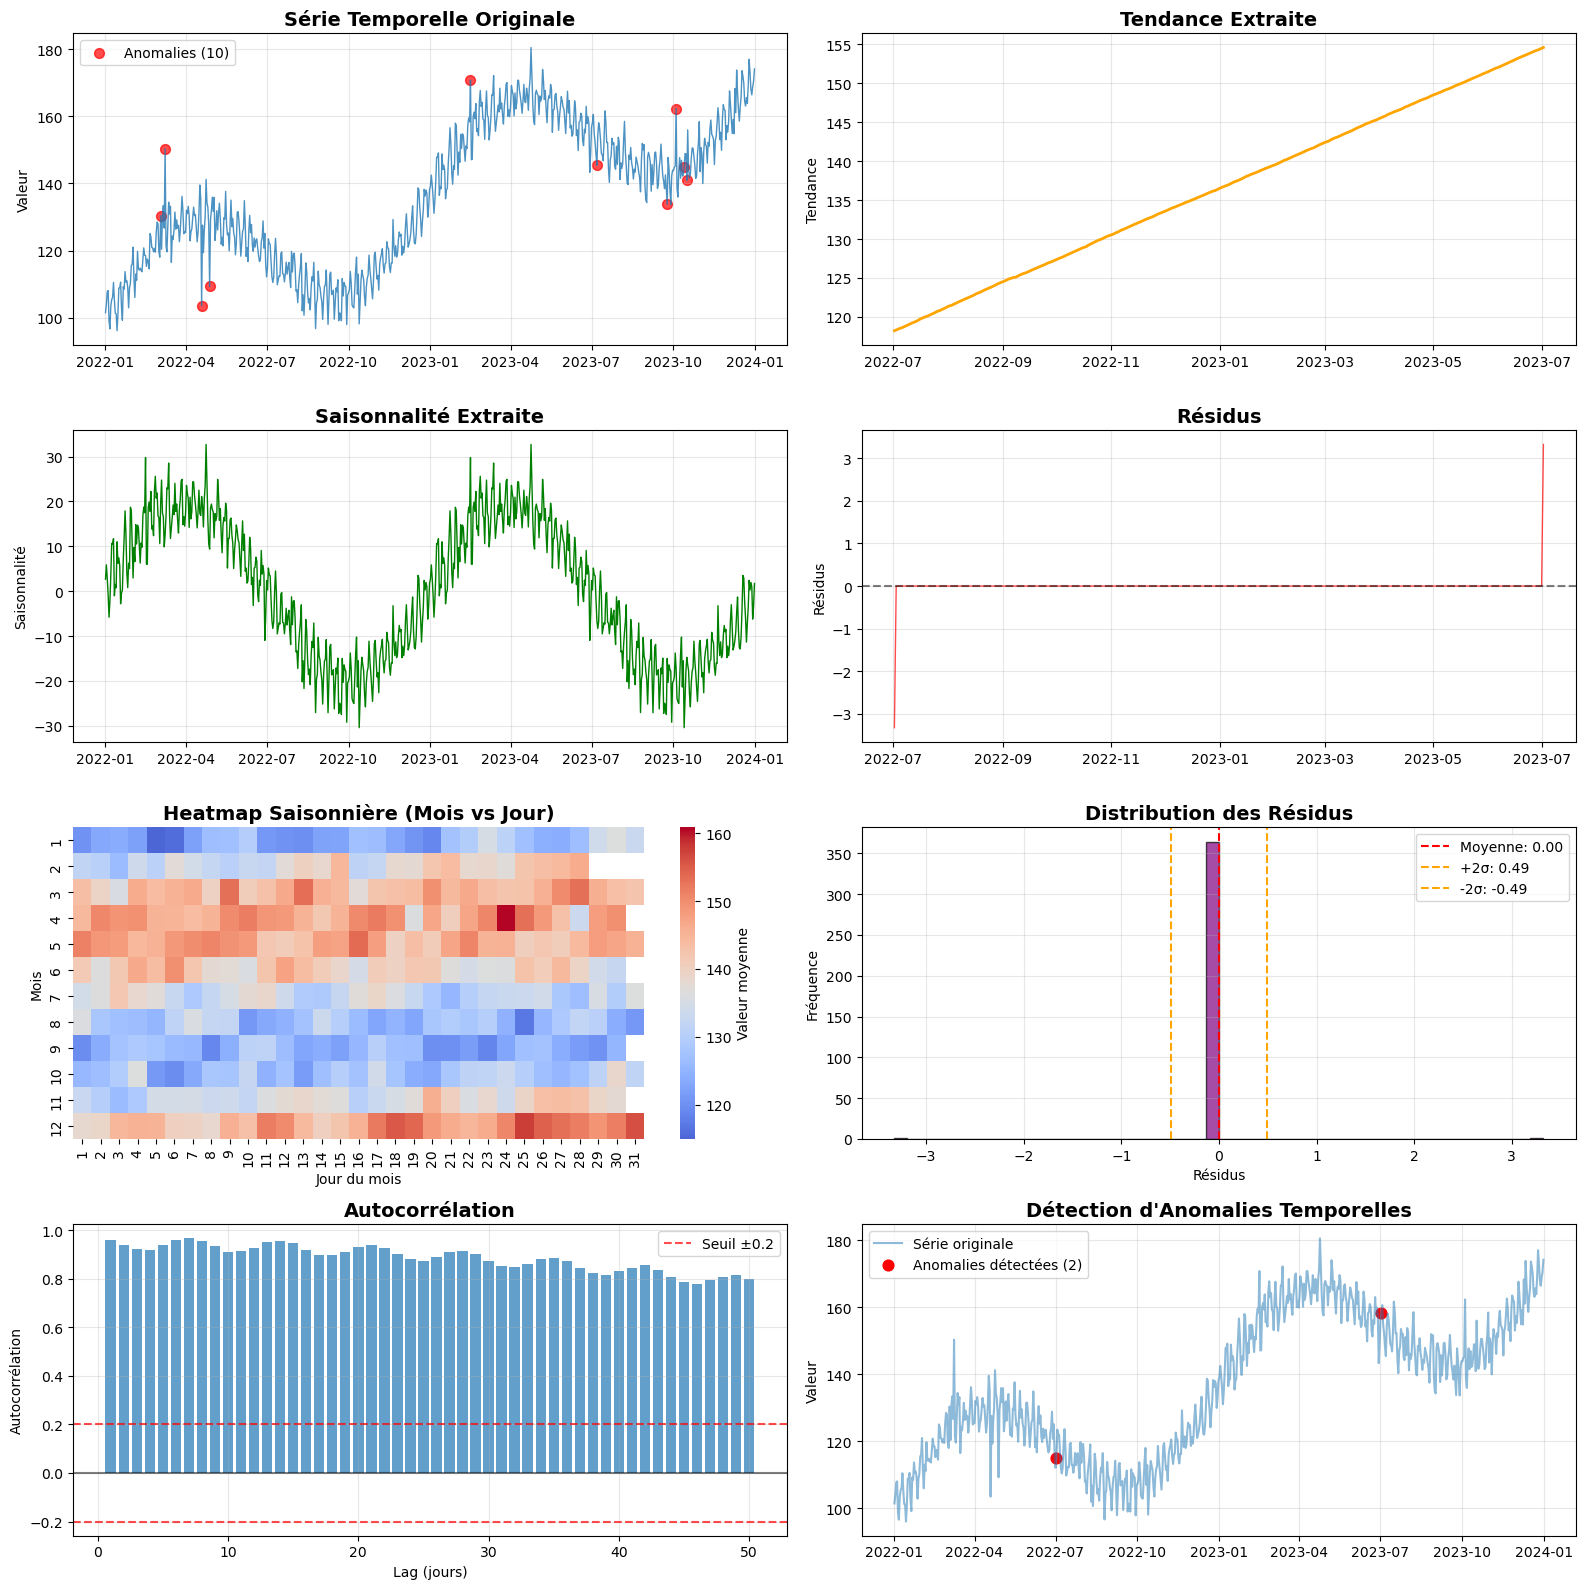

Analyse de la série temporelle:
Période d'analyse: 2022-01-01 à 2023-12-31
Nombre de points: 730

Statistiques descriptives:
  • Moyenne: 136.40
  • Médiane: 136.80
  • Écart-type: 20.75
  • Min: 96.09
  • Max: 180.53

Analyse de la tendance:
  • Pente de la tendance: 0.0994 par jour
  • Tendance croissante détectée

Analyse de la saisonnalité:
  • Force de la saisonnalité: 0.716
  • Saisonnalité significative détectée

Analyse des résidus:
  • Moyenne des résidus: 0.0000
  • Écart-type des résidus: 0.25
  • Test de normalité (Shapiro-Wilk): p-value = 0.0000
  • Test de normalité (Jarque-Bera): p-value = 0.0000

Détection d'anomalies:
  • Seuil utilisé: ±0.62
  • Anomalies détectées: 2
  • Pourcentage d'anomalies: 0.27%

Autocorrélation:
  • Lags significatifs (>0.2): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  • Saisonnalité hebdomadaire détectée


In [6]:
#Analyse de séries temporelles complète
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy import signal
import seaborn as sns

# Créer une série temporelle avec tendance, saisonnalité et bruit
np.random.seed(42)
n_points = 365 * 2  # 2 ans de données journalières

# Créer les dates
start_date = datetime(2022, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(n_points)]

# Composantes de la série temporelle
t = np.arange(n_points)

# Tendance linéaire
trend = 0.1 * t + 100

# Saisonnalité annuelle
seasonal_yearly = 20 * np.sin(2 * np.pi * t / 365)

# Saisonnalité hebdomadaire
seasonal_weekly = 5 * np.sin(2 * np.pi * t / 7)

# Bruit aléatoire
noise = np.random.normal(0, 3, n_points)

# Quelques anomalies
anomalies = np.zeros(n_points)
anomaly_indices = np.random.choice(n_points, 10, replace=False)
anomalies[anomaly_indices] = np.random.normal(0, 20, 10)

# Série temporelle finale
ts_values = trend + seasonal_yearly + seasonal_weekly + noise + anomalies

# Créer le DataFrame
ts_data = pd.DataFrame({
    'date': dates,
    'value': ts_values,
    'trend': trend,
    'seasonal_yearly': seasonal_yearly,
    'seasonal_weekly': seasonal_weekly,
    'noise': noise,
    'anomalies': anomalies
})

ts_data.set_index('date', inplace=True)

# Décomposition de la série temporelle
def decompose_timeseries(ts, period=365):
    """Décomposition manuelle d'une série temporelle"""
    
    # Tendance avec moyenne mobile
    trend = ts.rolling(window=period, center=True).mean()
    
    # Saisonnalité
    detrended = ts - trend
    seasonal = detrended.groupby(detrended.index.dayofyear).mean()
    
    # Répéter la saisonnalité pour toute la série
    seasonal_full = pd.Series(index=ts.index, dtype=float)
    for i, date in enumerate(ts.index):
        day_of_year = date.timetuple().tm_yday
        if day_of_year in seasonal.index:
            seasonal_full.iloc[i] = seasonal[day_of_year]
        else:  # 29 février dans années bissextiles
            seasonal_full.iloc[i] = seasonal[59]  # Utiliser 28 février
    
    # Résidus
    residual = ts - trend - seasonal_full
    
    return trend, seasonal_full, residual

# Appliquer la décomposition
trend_decomp, seasonal_decomp, residual_decomp = decompose_timeseries(ts_data['value'])

# Visualisations
fig, axes = plt.subplots(4, 2, figsize=(16, 16))

# 1. Série temporelle originale
axes[0, 0].plot(ts_data.index, ts_data['value'], linewidth=1, alpha=0.8)
axes[0, 0].set_title('Série Temporelle Originale', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Valeur')
axes[0, 0].grid(True, alpha=0.3)

# Marquer les anomalies
anomaly_dates = ts_data[ts_data['anomalies'] != 0].index
anomaly_values = ts_data[ts_data['anomalies'] != 0]['value']
axes[0, 0].scatter(anomaly_dates, anomaly_values, color='red', s=50, 
                  alpha=0.7, label=f'Anomalies ({len(anomaly_dates)})')
axes[0, 0].legend()

# 2. Décomposition - Tendance
axes[0, 1].plot(ts_data.index, trend_decomp, color='orange', linewidth=2)
axes[0, 1].set_title('Tendance Extraite', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Tendance')
axes[0, 1].grid(True, alpha=0.3)

# 3. Décomposition - Saisonnalité
axes[1, 0].plot(ts_data.index, seasonal_decomp, color='green', linewidth=1)
axes[1, 0].set_title('Saisonnalité Extraite', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Saisonnalité')
axes[1, 0].grid(True, alpha=0.3)

# 4. Décomposition - Résidus
axes[1, 1].plot(ts_data.index, residual_decomp, color='red', linewidth=1, alpha=0.7)
axes[1, 1].set_title('Résidus', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Résidus')
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 1].grid(True, alpha=0.3)

# 5. Analyse de saisonnalité - Heatmap mensuelle
ts_data['month'] = ts_data.index.month
ts_data['day'] = ts_data.index.day
monthly_data = ts_data.pivot_table(values='value', index='day', columns='month', aggfunc='mean')

sns.heatmap(monthly_data.T, cmap='coolwarm', center=monthly_data.mean().mean(), 
           ax=axes[2, 0], cbar_kws={'label': 'Valeur moyenne'})
axes[2, 0].set_title('Heatmap Saisonnière (Mois vs Jour)', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('Jour du mois')
axes[2, 0].set_ylabel('Mois')

# 6. Distribution des résidus
axes[2, 1].hist(residual_decomp.dropna(), bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[2, 1].set_title('Distribution des Résidus', fontsize=14, fontweight='bold')
axes[2, 1].set_xlabel('Résidus')
axes[2, 1].set_ylabel('Fréquence')
axes[2, 1].grid(True, alpha=0.3)

# Ajouter statistiques sur le graphique
mean_residual = residual_decomp.mean()
std_residual = residual_decomp.std()
axes[2, 1].axvline(mean_residual, color='red', linestyle='--', 
                  label=f'Moyenne: {mean_residual:.2f}')
axes[2, 1].axvline(mean_residual + 2*std_residual, color='orange', linestyle='--', 
                  label=f'+2σ: {mean_residual + 2*std_residual:.2f}')
axes[2, 1].axvline(mean_residual - 2*std_residual, color='orange', linestyle='--', 
                  label=f'-2σ: {mean_residual - 2*std_residual:.2f}')
axes[2, 1].legend()

# 7. Autocorrélation
def plot_autocorrelation(series, lags=50, ax=None):
    """Tracer l'autocorrélation d'une série"""
    autocorr = [series.autocorr(lag=i) for i in range(1, lags+1)]
    
    if ax is None:
        fig, ax = plt.subplots()
    
    ax.bar(range(1, lags+1), autocorr, alpha=0.7)
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax.axhline(y=0.2, color='red', linestyle='--', alpha=0.7, label='Seuil ±0.2')
    ax.axhline(y=-0.2, color='red', linestyle='--', alpha=0.7)
    
    return autocorr

autocorr_values = plot_autocorrelation(ts_data['value'], lags=50, ax=axes[3, 0])
axes[3, 0].set_title('Autocorrélation', fontsize=14, fontweight='bold')
axes[3, 0].set_xlabel('Lag (jours)')
axes[3, 0].set_ylabel('Autocorrélation')
axes[3, 0].legend()
axes[3, 0].grid(True, alpha=0.3)

# 8. Détection d'anomalies dans les résidus
residual_clean = residual_decomp.dropna()
threshold = 2.5 * residual_clean.std()
anomalies_detected = residual_clean[np.abs(residual_clean) > threshold]

axes[3, 1].plot(ts_data.index, ts_data['value'], alpha=0.5, label='Série originale')
axes[3, 1].scatter(anomalies_detected.index, 
                  ts_data.loc[anomalies_detected.index, 'value'],
                  color='red', s=60, label=f'Anomalies détectées ({len(anomalies_detected)})')
axes[3, 1].set_title('Détection d\'Anomalies Temporelles', fontsize=14, fontweight='bold')
axes[3, 1].set_ylabel('Valeur')
axes[3, 1].legend()
axes[3, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyse statistique
print("Analyse de la série temporelle:")
print("=" * 60)

print(f"Période d'analyse: {ts_data.index.min().strftime('%Y-%m-%d')} à {ts_data.index.max().strftime('%Y-%m-%d')}")
print(f"Nombre de points: {len(ts_data)}")

print(f"\nStatistiques descriptives:")
print(f"  • Moyenne: {ts_data['value'].mean():.2f}")
print(f"  • Médiane: {ts_data['value'].median():.2f}")
print(f"  • Écart-type: {ts_data['value'].std():.2f}")
print(f"  • Min: {ts_data['value'].min():.2f}")
print(f"  • Max: {ts_data['value'].max():.2f}")

print(f"\nAnalyse de la tendance:")
trend_slope = np.polyfit(range(len(trend_decomp.dropna())), trend_decomp.dropna(), 1)[0]
print(f"  • Pente de la tendance: {trend_slope:.4f} par jour")
if trend_slope > 0.01:
    print("  • Tendance croissante détectée")
elif trend_slope < -0.01:
    print("  • Tendance décroissante détectée")
else:
    print("  • Pas de tendance claire")

print(f"\nAnalyse de la saisonnalité:")
seasonal_strength = seasonal_decomp.std() / ts_data['value'].std()
print(f"  • Force de la saisonnalité: {seasonal_strength:.3f}")
if seasonal_strength > 0.1:
    print("  • Saisonnalité significative détectée")

print(f"\nAnalyse des résidus:")
print(f"  • Moyenne des résidus: {residual_clean.mean():.4f}")
print(f"  • Écart-type des résidus: {residual_clean.std():.2f}")

# Test de normalité des résidus
from scipy.stats import shapiro, jarque_bera
shapiro_stat, shapiro_p = shapiro(residual_clean[:5000])  # Limiter pour Shapiro
jb_stat, jb_p = jarque_bera(residual_clean)

print(f"  • Test de normalité (Shapiro-Wilk): p-value = {shapiro_p:.4f}")
print(f"  • Test de normalité (Jarque-Bera): p-value = {jb_p:.4f}")

print(f"\nDétection d'anomalies:")
print(f"  • Seuil utilisé: ±{threshold:.2f}")
print(f"  • Anomalies détectées: {len(anomalies_detected)}")
print(f"  • Pourcentage d'anomalies: {len(anomalies_detected)/len(ts_data)*100:.2f}%")

# Autocorrélation significative
significant_lags = [i+1 for i, corr in enumerate(autocorr_values) if abs(corr) > 0.2]
print(f"\nAutocorrélation:")
print(f"  • Lags significatifs (>0.2): {significant_lags[:10]}")  # Afficher les 10 premiers
if 7 in significant_lags:
    print("  • Saisonnalité hebdomadaire détectée")
if any(lag in range(360, 370) for lag in significant_lags):
    print("  • Saisonnalité annuelle détectée")

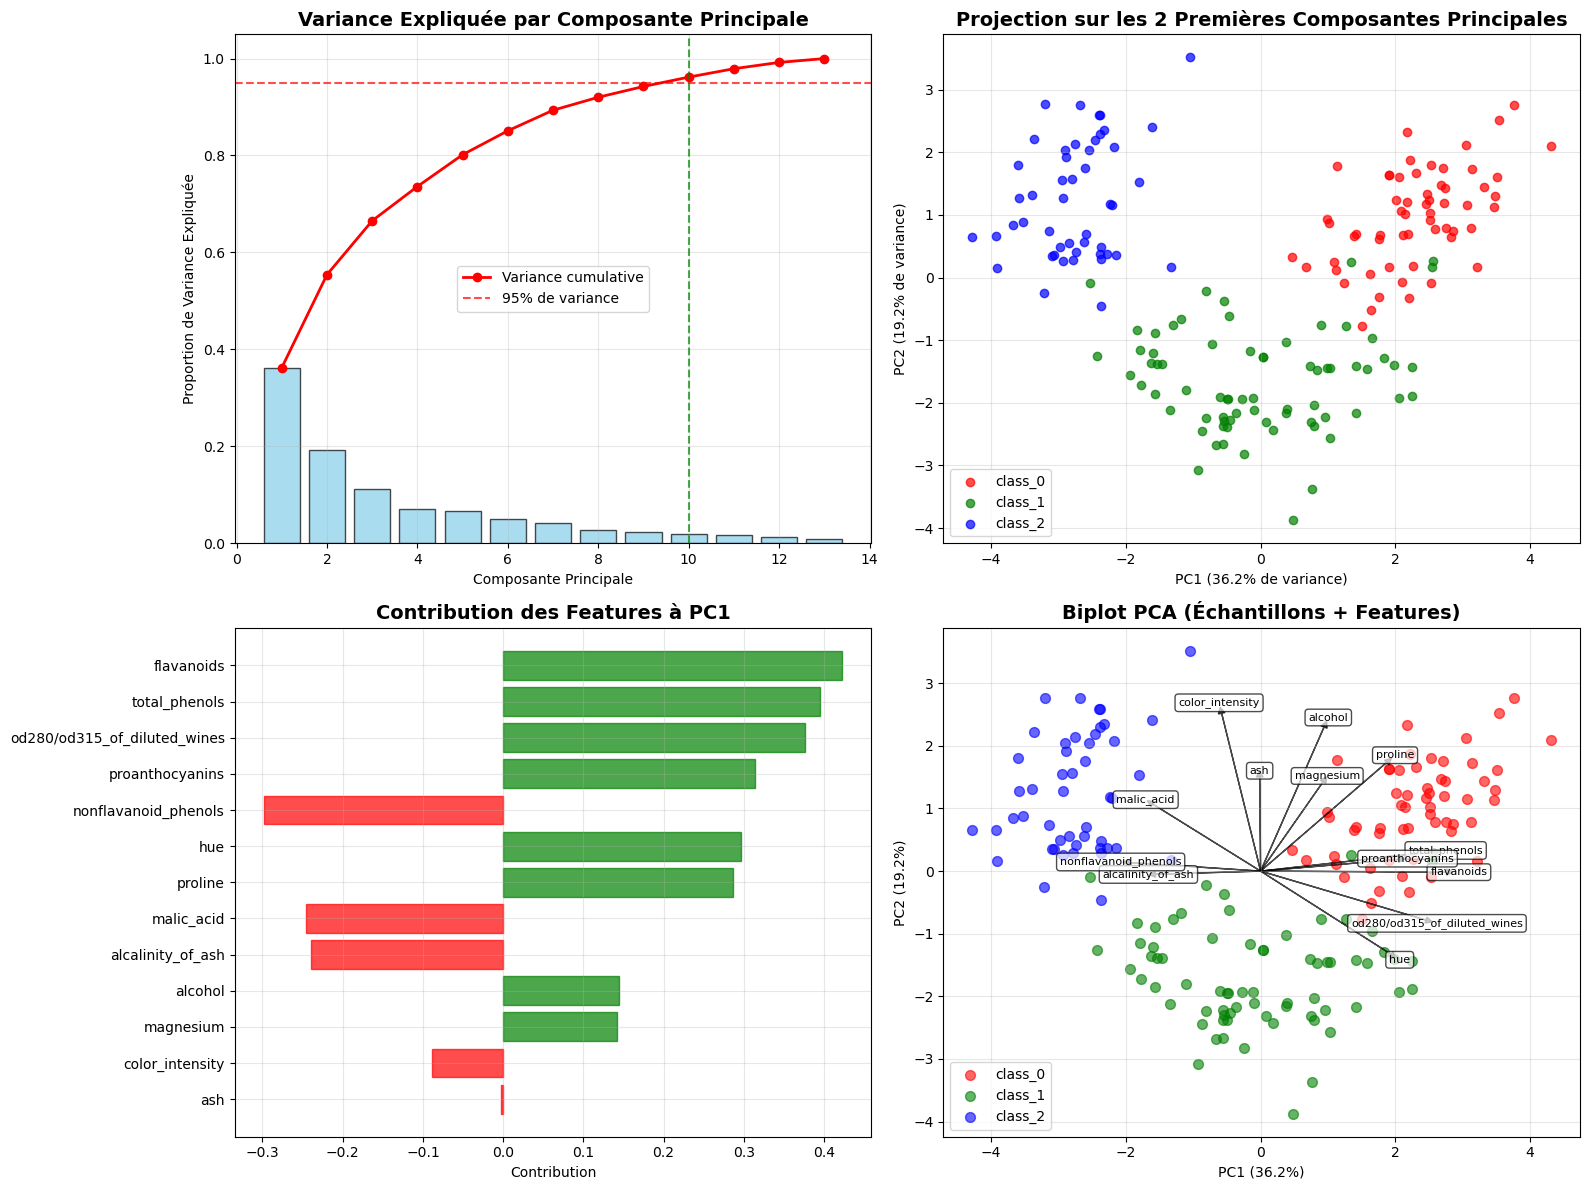

Analyse en Composantes Principales (PCA):
Dataset: 178 échantillons, 13 features
Classes: 3 (class_0, class_1, class_2)

Variance expliquée par composante:
  • PC1: 0.362 (36.2%)
  • PC2: 0.192 (19.2%)
  • PC3: 0.111 (11.1%)
  • PC4: 0.071 (7.1%)
  • PC5: 0.066 (6.6%)

Variance cumulative:
  • 5 composantes pour 80% de variance
  • 8 composantes pour 90% de variance
  • 10 composantes pour 95% de variance
  • 12 composantes pour 99% de variance

Top 5 features contribuant à PC1:
  • flavanoids: 0.423
  • total_phenols: 0.395
  • od280/od315_of_diluted_wines: 0.376
  • proanthocyanins: 0.313
  • nonflavanoid_phenols: -0.299

Top 5 features contribuant à PC2:
  • color_intensity: 0.530
  • alcohol: 0.484
  • proline: 0.365
  • ash: 0.316
  • magnesium: 0.300

Analyse de la séparabilité des classes:

Classe class_0:
  • Nombre d'échantillons: 59
  • Centroïde PC1: 2.283
  • Centroïde PC2: 0.968
  • Distance intra-classe moyenne: 1.389

Classe class_1:
  • Nombre d'échantillons: 71
  • Cen

In [8]:
#PCA pour la détection de patterns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Charger un dataset multidimensionnel
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Créer les visualisations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Variance expliquée par composante
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

axes[0, 0].bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 
              alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
               'ro-', linewidth=2, markersize=6, label='Variance cumulative')
axes[0, 0].set_title('Variance Expliquée par Composante Principale', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Composante Principale')
axes[0, 0].set_ylabel('Proportion de Variance Expliquée')
axes[0, 0].axhline(y=0.95, color='red', linestyle='--', alpha=0.7, label='95% de variance')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Trouver le nombre de composantes pour 95% de variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
axes[0, 0].axvline(x=n_components_95, color='green', linestyle='--', alpha=0.7, 
                  label=f'{n_components_95} composantes pour 95%')

# 2. Projection sur les 2 premières composantes principales
colors = ['red', 'green', 'blue']
for i, (color, target_name) in enumerate(zip(colors, target_names)):
    indices = y == i
    axes[0, 1].scatter(X_pca[indices, 0], X_pca[indices, 1], 
                      c=color, alpha=0.7, label=target_name)

axes[0, 1].set_title('Projection sur les 2 Premières Composantes Principales', 
                    fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel(f'PC1 ({explained_variance_ratio[0]:.1%} de variance)')
axes[0, 1].set_ylabel(f'PC2 ({explained_variance_ratio[1]:.1%} de variance)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Contribution des features aux composantes principales
# Prendre les 2 premières composantes
components_df = pd.DataFrame(
    pca.components_[:2].T,
    columns=['PC1', 'PC2'],
    index=feature_names
)

# Trier par contribution absolue à PC1
components_df['PC1_abs'] = np.abs(components_df['PC1'])
components_df_sorted = components_df.sort_values('PC1_abs', ascending=True)

# Graphique horizontal des contributions
y_pos = np.arange(len(feature_names))
bars = axes[1, 0].barh(y_pos, components_df_sorted['PC1'], alpha=0.7)

# Colorer les barres selon le signe
for i, bar in enumerate(bars):
    if components_df_sorted['PC1'].iloc[i] >= 0:
        bar.set_color('green')
    else:
        bar.set_color('red')

axes[1, 0].set_yticks(y_pos)
axes[1, 0].set_yticklabels(components_df_sorted.index, fontsize=10)
axes[1, 0].set_title('Contribution des Features à PC1', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Contribution')
axes[1, 0].grid(True, alpha=0.3)

# 4. Biplot (features + échantillons)
# Réduire PCA à 2 composantes pour le biplot
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Échantillons
for i, (color, target_name) in enumerate(zip(colors, target_names)):
    indices = y == i
    axes[1, 1].scatter(X_pca_2d[indices, 0], X_pca_2d[indices, 1], 
                      c=color, alpha=0.6, s=50, label=target_name)

# Vecteurs des features (loadings)
loadings = pca_2d.components_.T * np.sqrt(pca_2d.explained_variance_)
for i, (feature, loading) in enumerate(zip(feature_names, loadings)):
    # Ne montrer que les features les plus importantes
    if np.linalg.norm(loading) > 0.5:  # Seuil pour éviter la surcharge
        axes[1, 1].arrow(0, 0, loading[0]*3, loading[1]*3, 
                        head_width=0.1, head_length=0.1, fc='black', ec='black', alpha=0.7)
        axes[1, 1].text(loading[0]*3.2, loading[1]*3.2, feature, 
                        fontsize=8, ha='center', va='center',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

axes[1, 1].set_title('Biplot PCA (Échantillons + Features)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})')
axes[1, 1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyse détaillée
print("Analyse en Composantes Principales (PCA):")
print("=" * 60)

print(f"Dataset: {len(X)} échantillons, {len(feature_names)} features")
print(f"Classes: {len(target_names)} ({', '.join(target_names)})")

print(f"\nVariance expliquée par composante:")
for i, var_ratio in enumerate(explained_variance_ratio[:5]):
    print(f"  • PC{i+1}: {var_ratio:.3f} ({var_ratio*100:.1f}%)")

print(f"\nVariance cumulative:")
for threshold in [0.8, 0.9, 0.95, 0.99]:
    n_comp = np.argmax(cumulative_variance >= threshold) + 1
    print(f"  • {n_comp} composantes pour {threshold*100:.0f}% de variance")

print(f"\nTop 5 features contribuant à PC1:")
pc1_contributions = pd.Series(pca.components_[0], index=feature_names)
top_pc1 = pc1_contributions.abs().sort_values(ascending=False)[:5]
for feature, contrib in top_pc1.items():
    original_contrib = pc1_contributions[feature]
    print(f"  • {feature}: {original_contrib:.3f}")

print(f"\nTop 5 features contribuant à PC2:")
pc2_contributions = pd.Series(pca.components_[1], index=feature_names)
top_pc2 = pc2_contributions.abs().sort_values(ascending=False)[:5]
for feature, contrib in top_pc2.items():
    original_contrib = pc2_contributions[feature]
    print(f"  • {feature}: {original_contrib:.3f}")

# Analyser la séparabilité des classes dans l'espace PCA
from scipy.spatial.distance import pdist, squareform

print(f"\nAnalyse de la séparabilité des classes:")
for i, target_name in enumerate(target_names):
    class_data = X_pca_2d[y == i]
    centroid = np.mean(class_data, axis=0)
    print(f"\nClasse {target_name}:")
    print(f"  • Nombre d'échantillons: {len(class_data)}")
    print(f"  • Centroïde PC1: {centroid[0]:.3f}")
    print(f"  • Centroïde PC2: {centroid[1]:.3f}")
    
    # Dispersion intra-classe
    if len(class_data) > 1:
        distances = pdist(class_data)
        avg_intra_distance = np.mean(distances)
        print(f"  • Distance intra-classe moyenne: {avg_intra_distance:.3f}")

# Distances entre centroïdes des classes
centroids = []
for i in range(len(target_names)):
    centroid = np.mean(X_pca_2d[y == i], axis=0)
    centroids.append(centroid)

centroids = np.array(centroids)
inter_distances = pdist(centroids)

print(f"\nDistances entre centroïdes des classes:")
idx = 0
for i in range(len(target_names)):
    for j in range(i+1, len(target_names)):
        print(f"  • {target_names[i]} vs {target_names[j]}: {inter_distances[idx]:.3f}")
        idx += 1

# Recommandations
print(f"\nRecommandations:")
if cumulative_variance[1] > 0.8:
    print("• Les 2 premières composantes capturent >80% de la variance - réduction dimensionnelle efficace")
else:
    print("• Considérer plus de 2 composantes pour une meilleure représentation")

if np.min(inter_distances) > 2.0:
    print("• Classes bien séparées dans l'espace PCA")
elif np.min(inter_distances) > 1.0:
    print("• Classes modérément séparées dans l'espace PCA")
else:
    print("• Classes peu séparées - considérer d'autres techniques de réduction dimensionnelle")